In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Cheynhen\Python\Dataset\e-commerce\Finaldata_Adjusted_Income_Product_Ratio_Dataset_Cleaned.csv')

data = data.drop(columns=['Customer Name'])

data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='ISO8601')

# Calculate Average Purchase Value
# Group by 'Customer ID' to calculate metrics
customer_metrics = data.groupby('Customer ID').agg(
  total_revenue=('Total purchase amount', 'sum'),
  total_purchases=('Total purchase amount', 'count'),
  churn=('Churn', 'mean')
).reset_index()

# Calculate CLV
customer_metrics['CLV'] = customer_metrics['total_revenue'] * (1 - customer_metrics['churn'])

# Merge CLV back to the original dataset
data = data.merge(customer_metrics[['Customer ID', 'CLV']], on='Customer ID', how='left')

# Display the dataset with Customer Lifetime and CLV
print(data[['Customer ID', 'CLV']])

# Display basic information and first few rows of the dataset to assess its structure
data_info = data.info()
data_head = data.head()

data_info, data_head

data.to_csv(r'C:\Cheynhen\Python\Dataset\e-commerce\ecom_with_clv.csv', index=False)

        Customer ID      CLV
0             46251  1728.60
1             46251  1728.60
2             46251  1728.60
3             46251  1728.60
4             13593  1651.20
...             ...      ...
249995        33308   407.34
249996        48835    18.63
249997        21019    51.00
249998        49234   461.68
249999        16971  1079.50

[250000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  int64         
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total purchase amount  250000 non-null  int64         
 6   Payment Method         250000

In [3]:
data['Purchase Date'] = data['Purchase Date'].astype('int64') / 10**9

inertia_values = []
K = range(1, 11)  # Testing from 1 to 10 clusters

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
  inertia_values.append(kmeans.inertia_)

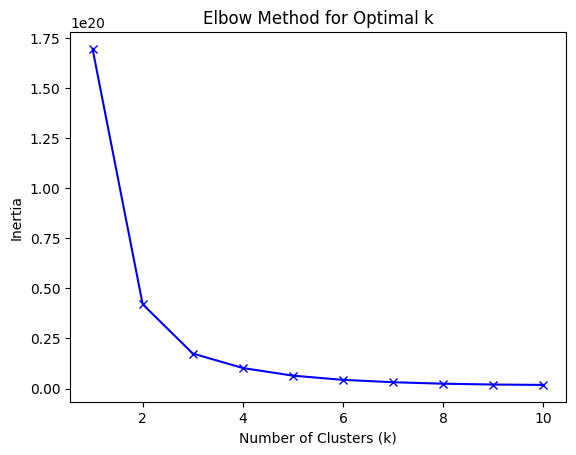

In [4]:
# Plotting the elbow curve
plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

k = 3 maybe?

In [5]:
n_clusters = 3
optimal_model = KMeans(n_clusters=n_clusters, max_iter=100, algorithm="lloyd", n_init=100, random_state=42).fit(data)
cluster_labels = optimal_model.predict(data)
labels = optimal_model.labels_

db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")

pc_reduced = PCA(n_components=2, random_state=42).fit(data)

reduced_data = pc_reduced.transform(data)

Davies-Bouldin Index: 0.46000639663468207


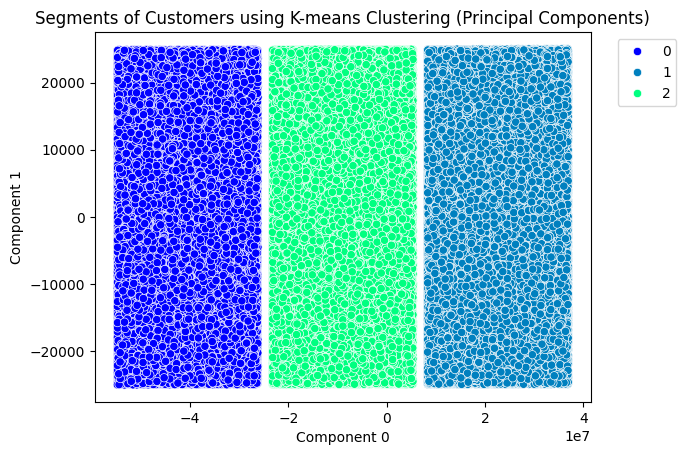

In [6]:
cmap = matplotlib.colormaps["winter"]

ax = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette=cmap)
ax.set_title("Segments of Customers using K-means Clustering (Principal Components)")
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")